# Continuous Power Spectrum and the Significance of Spectral Peaks

In this section, we will examine how to construct the **continuous power spectrum** and how we can use this to assess the statistical significance of spectral peaks.

### Drawbacks of DFT:

While the discrete power spectrum is fine if we have an infinite sample, it has serious drawbacks if we only have a finite data record:

- integral values of $k$ do not have any special relationship to the population being sampled, and are completely dependent on the length of the data record $T$ which is presumably arbitrary.

- the individual spectral lines each contain about 2 degrees of freedom: $N$+1 data points were used to determine, $N$/2 amplitudes and $N$/2 - 1 phases.

- except for diurnal/seasonal cycles, most geophysical phenomena are only quasi-periodic, and thus, do not conform to the idea of a single integer wavenumber, but are likely better represented as spectral bands of finite width.

These considerations suggest the notion of a **continuous power spectrum**, where the variance $y(t)$ is given per unit frequency (or wavenumber). This is what we will cover in this section.

## Construction of Continuous Power Spectrum

Recall that under the discrete power spectrum framework, the variance of a time series, $y(t)$ can be approximated as,

$$
\overline{y(t)^{\prime 2}} = \sum_{k=1}^{N/2}\frac{C_k^2}{2}
$$

where $k$ is an integer. As mentioned previously, restricting the power spectrum to integer values of $k$ has drawbacks.

Alternatively, we define the variance of $y(t)$ over a continuous value for $k$ as follows, 

$$
\overline{y(t)^{\prime 2}} = \int_{0}^{k^*} \phi (k) \,dk
$$


where, 
- $\phi (k)$ is the continuous power spectrum
- $k^*$ corresponds to the Nyquist frequency, i.e. one cycle per 2$\Delta t$ where $\Delta t$ is the constant spacing between data points

Note that $\phi (k)$ is simply a continuous version of $\frac{C_k^2}{2}$ and is estimated either by smoothing the line spectrum or by averaging many line spectra together. Let's take a look at these two methods of computing $\phi (k)$. The process of computing the continuous power spectrum results in a greater number of degrees of freedom (d.o.f.) per spectral estimate, which allows us to assess the statistical significance of these spectral estimates.

***Two ways of constructing a continuous power spectrum and obtaining more degrees of freedom:***

1. Average adjacent spectral estimates together: we lose resolution, but gain d.o.f.. For example, if you average 10 adjacent spectral estimates together, the frequency resolution decreases by a factor of 10 but the number of d.o.f. increases by a factor of 10.

2. Average realizations of the spectra together: we lose information at lower frequencies but gain d.o.f. For example, if you subdivide a long time series into 10 shorter time series of equal length, the lowest frequencies resolved increases by a factor of 10, but the number of d.o.f. also increases by a factor of 10.

When constructing a continuous power spectrum, there is a trade-off between resolution and robustness (degrees of freedom).

Formally, the **degrees of freedom per spectral estimate** is given by:

$$
D.O.F. = \frac{N}{M^*}
$$

where $M^*$ is the number of independent spectral estimates and $N$ is the number of actual data points. So, for the discrete power spectrum, $M^*$ = $N$/2, and so, $D.O.F. = \frac{N}{(N/2)}$ = 2. For a continuous power spectrum, $M^*$ decreases, but $D.O.F.$ increases.

### Plotting the Continuous Power Spectrum

Before we move on, here are a few notes about plotting the continuous power spectrum. There are two basic schemes for plotting the power spectra

1. the linear scale
2. the logarithmic scale


In the linear scale, you plot the wavenumber (or frequency, $\omega$) versus the power spectral density $\phi (k)$ (or $\phi (\omega)$), such that the power or variance between two wavenumbers is proportional to the integral under the curve.

In this case,

$$
\int_{k_1}^{k_2} \phi (k) \,dk
$$

is the variance in the time series between $k$=$k_1$ and $k$ = $k_2$.

When the frequency interval of interest ranges over several orders of magnitude, it is useful to plot the natural log of the $x$-axis (e.g. wavenumber/frequency). 

In this case, the $y$-axis scale is set to $k\phi (k)$ such that the area under the curve remains proportional to the total variance, i.e.

$$
\int_{\text{ln}(k_1)}^{\text{ln}k_2} k\phi (k) \,d(\text{ln}k) = \int_{k_1}^{k_2} \phi (k) \,dk
$$

where

$$
dx = x d(\text{ln}x)
$$

since

$$
d(\text{ln}x) = \frac{dx}{x}
$$

In the log-scale, the low-frequency end of the spectrum is stretched. In the example below, we will take a look at plotting the continuous power spectrum both ways.

We will take a look at plotting the continuous power spectrum in the two different ways below.

## Testing the Significance of Spectral Peaks

The statistical significance of spectral peaks is typically assessed by testing against the null hypothesis that the data is just “red noise”, i.e. it has low-frequency variability but is **not periodic**. Recall that the autocorrelation function of red noise did not contain any periodicity, just a decaying exponential.

The amplitude of a spectral peak is tested against the spectrum of the red noise fit to the data. Since the continuous power spectrum is a plot of variance per unit frequency, to test the statistical significance of a spectral peak, we are interested in the ratio of variances between the power spectrum of interest, $\phi_1$ and the corresponding power spectrum of red noise, $\phi_0$. The significance of this ratio can be assessed using the $F$**-statistic**:

$$
F = \frac{S_1^2}{S_0^2}
$$

where $S_1^2$ and $S_0^2$ are the variances of the original spectrum and the red noise spectrum. The $F$-statistic requires the degrees of freedom $\nu_1$ and $\nu_0$ for the numerator and denominator.
- for red noise ($\nu_0$), we typically assume it is a large number 
- for the real time series ($\nu_1$), use $N$/(# of spectral estimates) = $N$/$M^*$

[Figure 22](enso_cesm) shows an example of the continuous power spectrum of the Niño3.4 index for an observational data product (left) and for a global climate model (right) along with the red noise power spectrum and its upper 95\% and 99\% confidence limits. For each panel, $\phi_1$ is the power spectrum of the Niño3.4 index (black curve) and the $\phi_0$ is the corresponding power spectrum of red noise (red curve). 

```{figure} ENSO_CESM.png
---
scale: 75%
name: enso_cesm
---
Continuous power spectra of the Niño3.4 index for (left) the ERSST version 5 observational data product and (right) and [Community Earth System Model version 2](http://www.cesm.ucar.edu/working_groups/CVC/cvdp/) (black curves). Note that the ERSST power spectrum in reproduced in the right panel in grey. The red curve show the corresponding red noise power spectrum for each time series and the blue and green curves show the upper 95\% and 99\% confidence limits on the red noise spectrum. Where the black curves exceed the blue curves, the variance in that frequency range is significantly different from red noise.
```

Let's take a look at an example.

```{admonition} Question #1
:class: tip
Suppose you have a daily time series that is 512 days in length. You have split it into 128-day chunks (4 separate realizations) and calculated the continuous power spectrum by averaging the discrete power spectra of the 4 chunks together. If you have a peak in your continuous spectrum that is 3 times higher than the red noise value, is this significant at the 99% confidence level?
```

How would you go about solving this?

1. let's assume the peak is at a location we expected *a priori*.

2. analogous to the $t$-test, we need to find out whether $F_{crit}$ < 3. If so, we can reject the null hypothesis that the peak is just random fluctuations of a red noise time series.

3. we need to determine the degrees of freedom for our data and the red-noise time series, $\nu_{data}$, $\nu_{red}$

$$
\begin{align}
\nu_{data} &= \frac{N}{M^*}\\
& = \frac{N}{N/4/2}
& = \frac{512}{128/2}\\
&= 8
\end{align}
$$

and

$$
\nu_{red} = \text{large number (typically greater than 100)}
$$

Now, we can look up the critical $F$-value.

4. remember that for the $F$-statistic, the data is the numerator and the red-noise is the denominator.

We can use an $F$-table to find the critical $F$-value or we can use the built-in `scipy.stats` function.

In [1]:
# import packages
import numpy as np
import scipy.stats as st

# degrees of freedom
dfn = 8
dfd = 100

# one-sided critical F-value
f_crit = st.f.ppf(0.99,8,100)
print(np.round(f_crit,2))

2.69


Since $F_{crit}$ = 2.69 < 3, our peak passes the $F$-test and we can reject the null hypothesis.

### Power Spectrum of Red Noise

So, now that we have a sense of how to assess the statistical significance of spectral peaks, we need an expression to compute the power spectrum of red noise. We will approach this using an [Wiener-Khinchin theorem](https://en.wikipedia.org/wiki/Wiener%E2%80%93Khinchin_theorem#:~:text=In%20applied%20mathematics%2C%20the%20Wiener,decomposition%20given%20by%20the%20power) that states that

```{admonition} Wiener-Khinchin Theorem
:class: note
For a time series, $y(t)$, the autocorrelation function, $\gamma(\tau)$ and the power spectrum $\phi(\omega)$ are Fourier transforms of each other.
```
As we have done previously, we are not going to prove this theorem, but make use of it. Recall that the autocorrelation function for red-noise is

$$
\gamma(\tau) = e^{\frac{-\tau}{T_e}}
$$

where $T_e$ is the $e$-folding time-scale. 


The power spectrum is the Fourier Transform of $\gamma(\tau)$,

$$
\phi(\omega) = \int_{-\infty}^{\infty} e^{\frac{-\tau}{T_e}}e^{-i\omega t} \,d\tau
$$

and after integration we get,

$$
\phi(\omega) = \frac{2T_e}{1+T_e^2\omega^2}
$$

In the real world, we only have an estimate of red noise based on a limited sample, while the above is for an infinitely long sample. Thus, in practice, we will use the discrete red noise spectrum developed by Gilman et al. (1963) where its unnormalized form is given by,

$$
\phi(\omega)_{discrete} = \frac{1-\rho^2}{1-2\rho\text{cos}(\frac{h\pi}{N/2})+\rho^2}
$$

where h = 0,1,2,...,$N$/2 and $\rho$ is the lag-1 autocorrelation of the time series. Note that this discrete version does not differ much from the theoretical version, and the theoretical version is more conservative.

Now, let's look at an example.

In [2]:
# import extra packages
import matplotlib.pyplot as plt
import scipy.signal as sig

We are going to create a synthetic time series that combines a red noise process with a periodic cosine wave with a frequency of 0.2 cycles per time step. Let's set up some parameters for this time series:

In [3]:
# input parameters
T = 256         #length of time series
alpha = 0.5     #red noise lag-one autocorrelation
beta = np.sqrt(1.-alpha**2)  #beta, red noise parameter

T2 = T/2
freq = np.arange(0.,T2+1.)/T

We will use the Gilman et al. expression for the power spectrum of a red noise process:

In [4]:
# contstruct expected red noise spectrum 
rspec = []
for h in np.arange(0,T2+1,1):
    rspec.append((1.-alpha**2)/(1.-2.*alpha*np.cos(np.pi*(h)/T2)+alpha**2))

We are going to work our way up to constructing a continuous power spectrum by computing the power spectrum for multiple realizations and taking the average. We are going to use a function called `scipy.signal.welch` to compute the power spectrum and we will discuss the details of this function in the next section. For now, we will just take it as given that this function gives us the discrete power spectrum.

Let's start by assuming that we just have one realization of our synthetic time series. This means that the degrees of freedom for any spectral peak is only 2. Thus, the confidence limits on the red noise spectrum will be quite large.

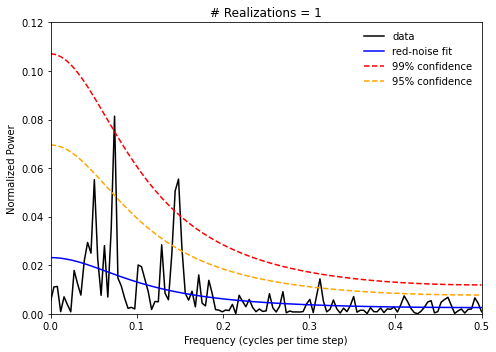

In [5]:
# initialize array for zeros for synthetic time series
x = np.zeros(T,)

# construct synthetic time series (note the f for the cosine wave is approximate 0.2)
x[0] = beta*np.random.randn()
for j in np.arange(1,T,1):
    x[j] = x[j-1]*alpha + beta*np.random.randn()+0.5*np.cos(2.*np.pi*(0.99*np.random.randn())*50./256.*j)

# compute power spectrum
p = sig.welch(x,window='hanning', nperseg=T)
pave = p[1]

# normalize the spectrum
pave = pave/np.sum(pave)

# calculate significance using F-test
dof = 2
fstat = st.f.ppf(.99,dof,1000)
spec99 = [fstat*m for m in rspec]
    
fstat = st.f.ppf(.95,dof,1000)
spec95 = [fstat*m for m in rspec]
    
# plot power spectrum and red noise spectra
plt.figure(figsize=(7,5))
plt.xlabel('Frequency (cycles per time step)')
plt.ylabel('Normalized Power')
plt.title('# Realizations = 1')
plt.ylim(0,0.12)
plt.xlim(0,0.5)
plt.plot(freq,pave,'-k', label = 'data')
plt.plot(freq,rspec/np.sum(rspec),'-', label = 'red-noise fit', color = 'blue')
plt.plot(freq,spec99/np.sum(rspec),'--', label = '99% confidence', color = 'red')
plt.plot(freq,spec95/np.sum(rspec),'--', label = '95% confidence', color = 'orange')
plt.legend(frameon = False)
plt.tight_layout()

The power spectrum plot above does not clearly show one strong peak at a frequency of 0.2 as we might expect given the cosine component of the synthetic time series we constructed and most of the peaks in the power spectrum on not statistically significant. Because we have several random components in our time series, you will find that you get a slightly different power spectrum everytime you run the cell above.

Let's see what happens when we run mutliple realizations of the power spectrum and average them together. 

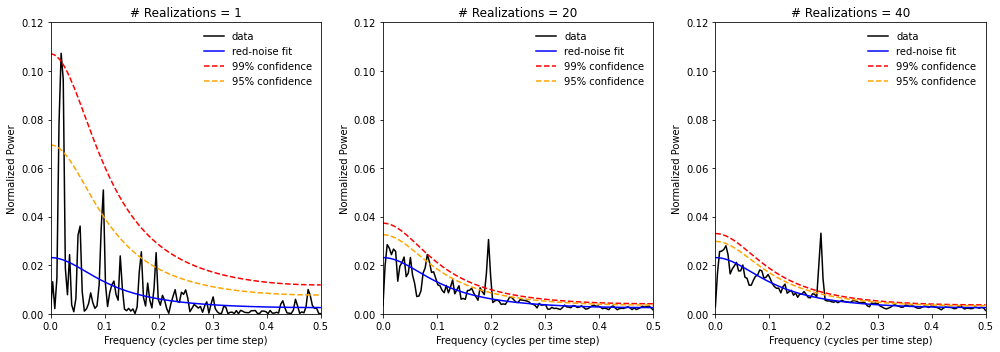

In [6]:
# initialize array for zeros for synthetic time series
x = np.zeros(T,)

# counter for plotting
s = 1
plt.figure(figsize=(14,5))

# loop over realizations
for ir in np.arange(0,40):
    
    # construct synthetic time series (note the f for the cosine wave is approximate 0.2)
    x[0] = beta*np.random.randn()
    for j in np.arange(1,T,1):
        x[j] = x[j-1]*alpha + beta*np.random.randn()+np.cos(2.*np.pi*(1.-0.01*np.random.randn())*50./256.*j)
        
    # compute power spectrum
    p = sig.welch(x,window='hanning', nperseg=T);
    if(ir==0):
        psum = p[1]
    else:
        # add power spectra for each realization together
        psum = psum + p[1]

    # calculate average    
    pave = psum/(ir+1.0)
    
    # normalize the spectrum
    pave = pave/np.sum(pave)
 
    
    # calculate significance using F-test
    dof = 2.*(ir+1.)
    fstat = st.f.ppf(.99,dof,1000)
    spec99 = [fstat*m for m in rspec]
    
    fstat = st.f.ppf(.95,dof,1000)
    spec95 = [fstat*m for m in rspec]
    
    # plot only for N = 1 and multiples of 20
    if((ir+1.) % 20 == 0 or ir==0):
        plt.subplot(1,3,s)
        plt.xlabel('Frequency (cycles per time step)')
        plt.ylabel('Normalized Power')
        plt.title('# Realizations = ' + str(ir+1))
        plt.ylim(0,0.12)
        plt.xlim(0,0.5)
        plt.plot(freq,pave,'-k', label = 'data')
        plt.plot(freq,rspec/np.sum(rspec),'-', label = 'red-noise fit', color = 'blue')
        plt.plot(freq,spec99/np.sum(rspec),'--', label = '99% confidence', color = 'red')
        plt.plot(freq,spec95/np.sum(rspec),'--', label = '95% confidence', color = 'orange')
        plt.legend(frameon = False)
        s = s + 1
plt.tight_layout()

As we increase the number of realizations, we see that the confidence limits on the red noise power spectrum decrease and we also see the a significant spectral peak at the frequency of the cosine wave component emerge. 

In the next section, we will take a closer look at the `scipy.sig.welch` function and the reasons behind why I have used this function in this example rather than the `np.fft.fft` function.